### Download data from NBP about flat prices. Data is in xlsx format, it contains two seperate spreadsheets "rynek pierwotny" i "rynek wtórny" and theare are two tables in each spreadsheet: transactional and offer prices.

In [320]:
%matplotlib inline

In [321]:
url = "https://www.nbp.pl/publikacje/rynek_nieruchomosci/ceny_mieszkan.xlsx"

Downloading the data

In [322]:
from urllib import request

path = '../data/prices.xlsx'
# Download remote and save locally
data = request.urlretrieve(url, path)

Load data into padas dataset. I will analize only data for new constructions - "rynek pierwotny"

In [323]:
import pandas as pd
import numpy as np

df = pd.read_excel(path,sheet_name=1)

In [324]:
df.head(10)

,Rynek pierwotny,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,Primary market,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PLN/1 sq.m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Ceny ofertowe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,średnia,NaN,NaN,NaN
3,NaN,Offer prices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,mean,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7 cities,10 cities,6 cities (without Warszawa),NaN
5,Kwartał,Białystok,Bydgoszcz,Gdańsk,Gdynia,Katowice,Kielce,Kraków,Lublin,Łódź,...,Poznań,Rzeszów,Szczecin,Warszawa,Wrocław,Zielona Góra,7 miast,10 miast,6 miast bez Warszawy,9 miast
6,III 2006,2727,3243,5004,4937,3986.27,2918.644443,6021,3456,3210,...,3620.845241,2656,3233.916487,5605,3211,2499.00893,3590.503415,2663.155087,4231,2813.827481
7,IV 2006,2727,3947,6199,5284,4062.31,3492.617589,7929,3314,4237,...,4725.658134,3013,3575.024357,6186,3777,2768.751404,5368.79462,3219.546861,4923.359666,3141.894314
8,I 2007,4181,4501,6437,6466,4518.37,3381.718956,8247,3604,4927,...,6444.721994,3469,3831.400406,7302,7062.85905,2499.814669,6499.214997,3275.503686,6121.367643,3172.595629
9,II 2007,4725,5700,7999,8934,5180.56,3901.57831,8129,4143,5453,...,7242.73,3517,4932.747279,7523,5289,3258.090803,6784.602588,3922.505883,6610.170027,3468.662814


Excel file is messy, lets pict only first 18 columns (offer prices, last for columns are summaries for few cities), and get rid of first 5 rows (empties with some additinal info)

In [325]:
#pick row nr 5 as columns names
cols = df.iloc[5:6, 0:18].values.tolist()
#slice the dataframe
df = df.iloc[6:, 0:18]
#and change its column names
df.columns = cols[0]
#rename Kwartał for eas of use
df = df.rename(columns={'Kwartał':'Quarter'})
df

,Quarter,Białystok,Bydgoszcz,Gdańsk,Gdynia,Katowice,Kielce,Kraków,Lublin,Łódź,Olsztyn,Opole,Poznań,Rzeszów,Szczecin,Warszawa,Wrocław,Zielona Góra
6,III 2006,2727,3243,5004,4937,3986.27,2918.644443,6021,3456,3210,4000,3342.843092,4769.933415,2862,3214.980636,5873,4750,2754.275993
7,IV 2006,2727,3947,6199,5284,4062.31,3492.617589,7929,3314,4237,4800,NaN,4827.2275,3401,3679.123336,6095,5759,2869.297734
8,I 2007,4181,4501,6437,6466,4518.37,3381.718956,8247,3604,4927,5149,NaN,7274.746093,3420,4749.124321,7509,6308.702547,2871.939482
9,II 2007,4725,5700,7999,8934,5180.56,3901.57831,8129,4143,5453,4776,NaN,7360.018661,4080,5049.969372,8000,6294,4153.489905
10,III 2007,4199,4994,8053,8114,6235.53,4651.056569,8420,4645,5201,4900,4784.143691,6837.76137,4069,5034.720763,8740,6444.287532,4207.569891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,IV 2021,8154.667964,8102.672213,11185.360925,10942.299978,8384.231834,6768.737773,11010.476395,7897.4,8117.335312,7202.668,7146.702739,9199.547977,7776.045525,9173.285955,11819.776106,10188.736321,7128.88143
68,I 2022,8317.783907,8308.990556,11356.052868,11342.464485,8849.635886,7123.739258,11157.350002,8170.49,8145.137193,7809.562,6837.903353,9841.233701,8101.905032,9413.58943,12517.311573,10351.791121,7295.015572
69,II 2022,8610.804227,8874.54633,11632.497925,11601.084377,9295.276303,7703.616526,11395.898639,8500.11,8481.22818,7960.45,8228.688298,9968.353303,8412.457098,9897.110676,12895.018423,10788.632174,7337.78687
70,III 2022,8722.57682,8857.123612,11619.84193,12056.590839,10107.067691,8067.553508,11728.972206,9381.58,8972.587872,8226.424,8340.77964,10140.796073,8695.758497,10968.953499,12911.995748,10962.562696,7390.078373


Now is the time to change the data type.

In [326]:
df.dtypes

Quarter         object
Białystok       object
Bydgoszcz       object
Gdańsk          object
Gdynia          object
Katowice        object
Kielce          object
Kraków          object
Lublin          object
Łódź            object
Olsztyn         object
Opole           object
Poznań          object
Rzeszów         object
Szczecin        object
Warszawa        object
Wrocław         object
Zielona Góra    object
dtype: object

Right now all the column types are object. We need to convert first column as date and the rest as floats.

In [327]:
#change price columns to floats
df[cols[0][1:]] = df[cols[0][1:]].astype(float)

#change date columns to datetime
#first convert the date format
dates = df['Quarter'].to_list()

new_dates = []
for date in dates:
    q,y = date.split()
    if q == 'I': q = 'Q1'
    if q == 'II': q = 'Q2'
    if q == 'III': q = 'Q3'
    if q == 'IV': q = 'Q4'
    new_dates.append(y + '-' + q)
new_dates

#update dates and change data type
df['Quarter'] = new_dates
df['date'] = pd.to_datetime(df['Quarter'])

#delate Quarter column
df = df.drop('Quarter', axis=1)

df.dtypes

Białystok              float64
Bydgoszcz              float64
Gdańsk                 float64
Gdynia                 float64
Katowice               float64
Kielce                 float64
Kraków                 float64
Lublin                 float64
Łódź                   float64
Olsztyn                float64
Opole                  float64
Poznań                 float64
Rzeszów                float64
Szczecin               float64
Warszawa               float64
Wrocław                float64
Zielona Góra           float64
date            datetime64[ns]
dtype: object

In [328]:
#set date as index
df = df.set_index('date')

Check the data for Nan values

In [329]:
df.isnull().sum()

Białystok       0
Bydgoszcz       0
Gdańsk          0
Gdynia          0
Katowice        0
Kielce          0
Kraków          0
Lublin          0
Łódź            0
Olsztyn         0
Opole           3
Poznań          0
Rzeszów         0
Szczecin        0
Warszawa        0
Wrocław         0
Zielona Góra    0
dtype: int64

Lets change the Nan values from opole to the mean of the other cities.

In [330]:

#select all columns other than opole for mean calculation
mean = df[df.isnull().any(axis=1)].loc[:,df.columns != 'Opole'].mean(axis=1)
#overwrite the Nan values with mean
df.loc[df.isnull().any(axis=1), 'Opole'] = mean.values

#check for Nan again
df.isnull().sum()

Białystok       0
Bydgoszcz       0
Gdańsk          0
Gdynia          0
Katowice        0
Kielce          0
Kraków          0
Lublin          0
Łódź            0
Olsztyn         0
Opole           0
Poznań          0
Rzeszów         0
Szczecin        0
Warszawa        0
Wrocław         0
Zielona Góra    0
dtype: int64

### OK, now our price data is now clean and ready to use. Lets make few quick plots to better understand what is going on.

Text(0, 0.5, 'Price per sqrm')

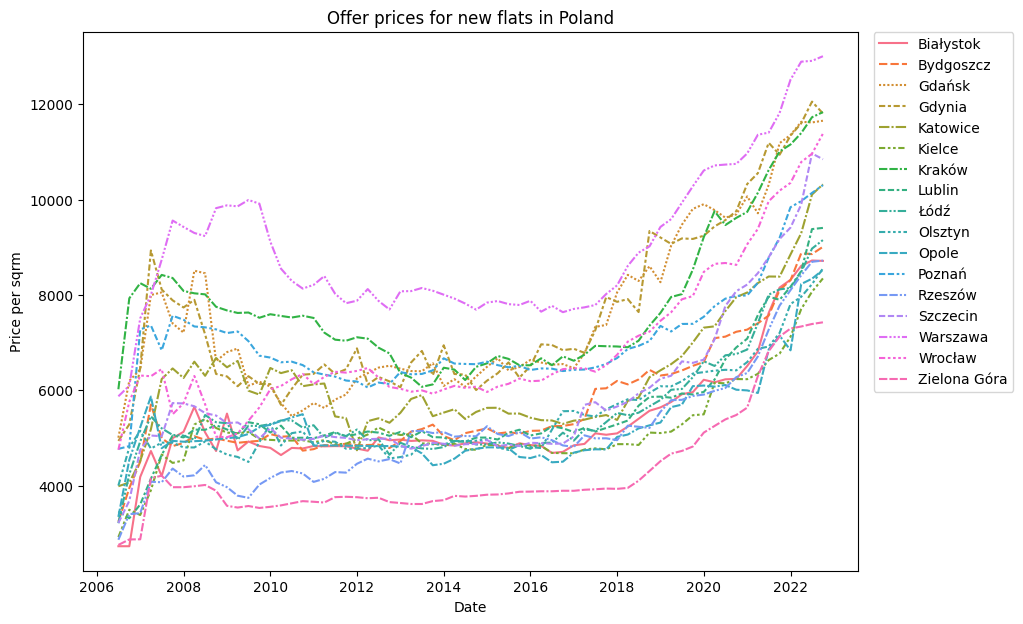

In [331]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10,7))
cities = df.columns.values.tolist()[:-1]
sns.lineplot(df, ax=ax)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Offer prices for new flats in Poland')
plt.xlabel('Date')
plt.ylabel('Price per sqrm')

We can see from around 2017 prices are rising afrer few years of stable price level.

## Lets analize the values for seasonality, trend and noise.

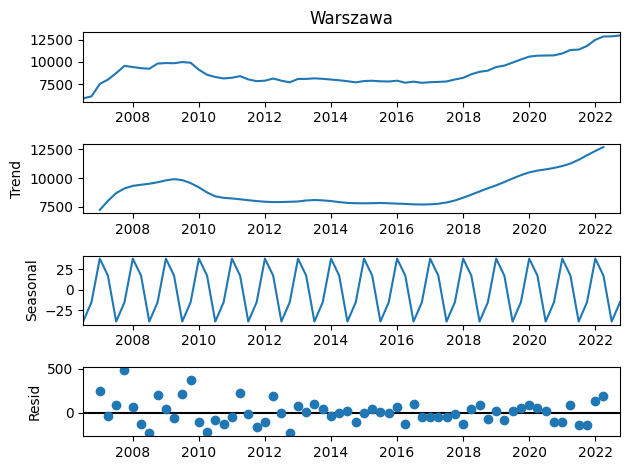

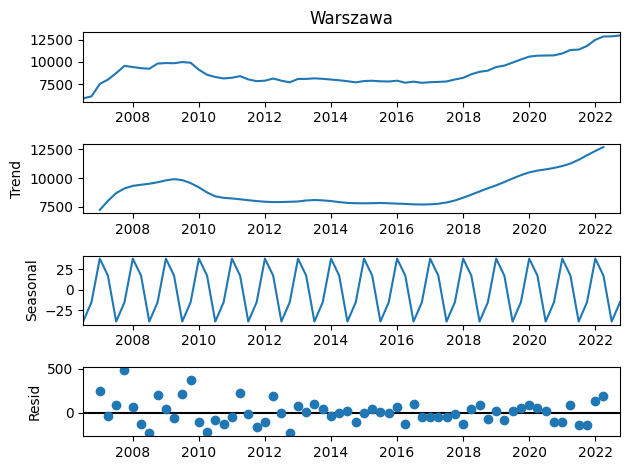

In [332]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec_plot = seasonal_decompose(df['Warszawa'])
dec_plot.plot()

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


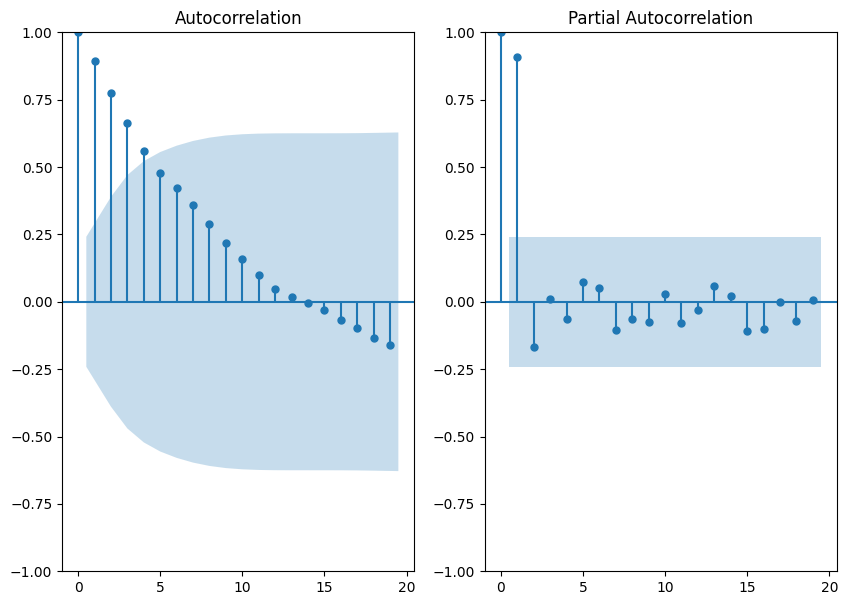

In [333]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(1, 2, figsize=(10,7))
plot_acf(df['Warszawa'], ax=ax[0])
plot_pacf(df['Warszawa'], ax=ax[1])
plt.show()

Dickey-Fuller test for non-stationarity

In [334]:
from statsmodels.tsa.stattools import adfuller

adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df['Warszawa'])
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)


ADF test statistic: -0.8372491414709274
ADF p-values: 0.8079348618665758
ADF number of lags used: 1
ADF number of observations: 64
ADF critical values: {'1%': -3.53692771987915, '5%': -2.907887369384766, '10%': -2.591493291015625}
ADF best information criterion: 740.8422476308222


P values over 0.05 --> data is non-stationary

Lets change the values of the dataset from absolute price values to relative price change

In [335]:
df_rel = df - df.shift()
df_rel

,Białystok,Bydgoszcz,Gdańsk,Gdynia,Katowice,Kielce,Kraków,Lublin,Łódź,Olsztyn,Opole,Poznań,Rzeszów,Szczecin,Warszawa,Wrocław,Zielona Góra
date,,,,,,,,,,,,,,,,,
2006-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-10-01,0.000000,704.000000,1195.000000,347.000000,76.040000,573.973146,1908.000000,-142.00,1027.000000,800.000,1196.067918,57.294085,539.000000,464.142700,222.000000,1009.000000,115.021741
2007-01-01,1454.000000,554.000000,238.000000,1182.000000,456.060000,-110.898634,318.000000,290.00,690.000000,349.000,682.689077,2447.518593,19.000000,1070.000985,1414.000000,549.702547,2.641748
2007-04-01,544.000000,1199.000000,1562.000000,2468.000000,662.190000,519.859354,-118.000000,539.00,526.000000,-373.000,645.813428,85.272568,660.000000,300.845051,491.000000,-14.702547,1281.550423
2007-07-01,-526.000000,-706.000000,54.000000,-820.000000,1054.970000,749.478259,291.000000,502.00,-252.000000,124.000,-1083.269825,-522.257291,-11.000000,-15.248609,740.000000,150.287532,54.079986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,533.237059,535.442361,875.644344,-250.255501,-2.588626,135.558069,389.963068,-68.01,111.744148,285.461,291.649629,418.846499,505.285525,383.068354,414.229635,223.753714,309.373237
2022-01-01,163.115943,206.318343,170.691943,400.164507,465.404052,355.001485,146.873607,273.09,27.801881,606.894,-308.799386,641.685724,325.859507,240.303475,697.535467,163.054800,166.134142
2022-04-01,293.020320,565.555774,276.445056,258.619892,445.640417,579.877269,238.548637,329.62,336.090987,150.888,1390.784945,127.119602,310.552066,483.521246,377.706850,436.841053,42.771298


<AxesSubplot: xlabel='date'>

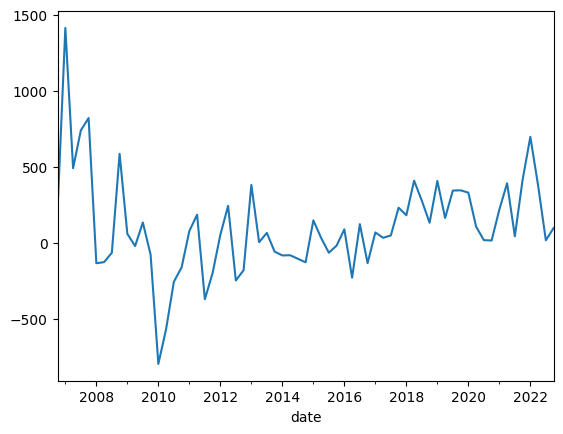

In [336]:
df_rel = df_rel.dropna(axis=0)
df_rel['Warszawa'].plot()


In [337]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_rel['Warszawa'])
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -4.821147931448128
ADF p-values: 4.953994599666978e-05
ADF number of lags used: 0
ADF number of observations: 64
ADF critical values: {'1%': -3.53692771987915, '5%': -2.907887369384766, '10%': -2.591493291015625}
ADF best information criterion: 726.2440364262624


Data is still not stationary.

In [338]:
df_rel

,Białystok,Bydgoszcz,Gdańsk,Gdynia,Katowice,Kielce,Kraków,Lublin,Łódź,Olsztyn,Opole,Poznań,Rzeszów,Szczecin,Warszawa,Wrocław,Zielona Góra
date,,,,,,,,,,,,,,,,,
2006-10-01,0.000000,704.000000,1195.000000,347.000000,76.040000,573.973146,1908.000000,-142.00,1027.000000,800.000,1196.067918,57.294085,539.000000,464.142700,222.000000,1009.000000,115.021741
2007-01-01,1454.000000,554.000000,238.000000,1182.000000,456.060000,-110.898634,318.000000,290.00,690.000000,349.000,682.689077,2447.518593,19.000000,1070.000985,1414.000000,549.702547,2.641748
2007-04-01,544.000000,1199.000000,1562.000000,2468.000000,662.190000,519.859354,-118.000000,539.00,526.000000,-373.000,645.813428,85.272568,660.000000,300.845051,491.000000,-14.702547,1281.550423
2007-07-01,-526.000000,-706.000000,54.000000,-820.000000,1054.970000,749.478259,291.000000,502.00,-252.000000,124.000,-1083.269825,-522.257291,-11.000000,-15.248609,740.000000,150.287532,54.079986
2007-10-01,796.000000,-165.000000,-651.000000,-227.000000,222.010000,-175.900993,-65.000000,402.00,-139.000000,0.000,153.290446,725.948857,288.000000,696.415424,821.000000,-949.151222,-242.093085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-01,533.237059,535.442361,875.644344,-250.255501,-2.588626,135.558069,389.963068,-68.01,111.744148,285.461,291.649629,418.846499,505.285525,383.068354,414.229635,223.753714,309.373237
2022-01-01,163.115943,206.318343,170.691943,400.164507,465.404052,355.001485,146.873607,273.09,27.801881,606.894,-308.799386,641.685724,325.859507,240.303475,697.535467,163.054800,166.134142
2022-04-01,293.020320,565.555774,276.445056,258.619892,445.640417,579.877269,238.548637,329.62,336.090987,150.888,1390.784945,127.119602,310.552066,483.521246,377.706850,436.841053,42.771298


In [339]:
#df_rel = df_rel.apply(lambda x: np.log(x))

In [340]:
#df_rel['Warszawa'].plot()